# Lenders Club Case Study

**Business Understanding**

The Lenders Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
-  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
-  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

**Objective**

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

Understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

**Importing Libraries required for the analysis**

In [452]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.express as px
from IPython.core.display import HTML

**Loading Data**

In [263]:
loan_data = pd.read_csv("loan.csv")

**Data cleaning and handling**

In [264]:
#getting idea about the data set
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [265]:
#dimensions of data
loan_data.shape

(39717, 111)

In [266]:
#information about columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [267]:
#checking sum of null values in columns
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [268]:
#dropping columns with all null values.
loan_data.drop(columns=['tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [270]:
#There seems to be more columns with all empty values, dropping it manually will be painful.
#finding columns with sum of null values greater than 10000
empty_columns=loan_data.isnull().sum()
empty_columns.loc[empty_columns.values>10000]

desc                              12940
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717


In [271]:
#dropping columns with more than 10,000 empty values
loan_data.drop(columns=list(empty_columns[empty_columns.values>10000].index),inplace=True)

In [272]:
#reviwing the updated data set
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

-------------------------------------------------------------------------------------------------------------------
**We now have 53 columns remaining**

Exploring to see if we can remove any columns which may not be usefull to analysis or maybe redundant

-------------------------------------------------------------------------------------------------------------------

In [273]:
#let us check for null values
loan_data.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

-------------------------------------------------------------------------------------------------------------------
**Do some columns have same values?**

When looking at the csv in MS Excel I noticed certain columns have the one single value. These columns are reduntant as they do not add any value in analysis.

Google search for finding unique values returns the use of nunique function https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html

-------------------------------------------------------------------------------------------------------------------

In [274]:
#see number of distinct values for the columns, 
#value 1 indicates that there is on 1 value present for the column
column = loan_data.nunique()
print(column)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [275]:
#columns with single values.
column[column.values==1]

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [276]:
#dropping the above columns
#column[column.values==1].index
loan_data.drop(columns=list(column[column.values==1].index),inplace=True)

In [277]:
#We also notice that the id, member_id and URL are also varying with every row.
#They also do not look to be useful for analysis. we can drop them as well.

loan_data.drop(columns=list(column[column.values==39717].index),inplace=True)

In [278]:
#checking data set information, we now have 41 columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

-------------------------------------------------------------------------------------------------------------------

**Are there any other columns that we can drop we necessary do not have any impact**

Let us look at the data set

-------------------------------------------------------------------------------------------------------------------

In [279]:
loan_data.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0


-------------------------------------------------------------------------------------------------------------------

**Looking at some of the columns it seems like they contain values which happen after someone has take the loan. They cannot be factor to determine if the loan should be given**

**out_prncp** -  I don't think outstanding principal amount influeces if a person is going to default as it is in future<br>
**out_prncp_inv** - Same logic as above<br>
**total_pymnt** - I don't think payments received also infleunces as it is in future<br>
**total_pymnt_inv** - Same logic as above<br>
**total_rec_prncp** - I don't think total money received till date influeces if a person is going to default as it is in future<br>
**total_rec_int** - Interest received till date cannot help in pretidicting if a loan should be given as it is in future<br>
**total_rec_late_fee** - same logic as above.<br>
**recoveries** - his happens in future , cannot be a factor to determine if the loan can be given.<br>
**collection_recovery_fee** - sames as above.<br>
**last_pymnt_d** - this happens in future , cannot be a factor to determine if the loan can be given.<br>
**last_pymnt_amnt** - this happens in future , cannot be a factor to determine if the loan can be given.<br>
**last_credit_pull_d** - this happens in future , cannot be a factor to determine if the loan can be given.<br>

-------------------------------------------------------------------------------------------------------------------

In [280]:
#let us drop the above columns
drop_to_columns = ['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan_data.drop(columns=drop_to_columns,inplace=True)

In [281]:
#lets review the data set
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

-------------------------------------------------------------------------------------------------------------------
**what other columns we can drop**

Reviewing columns and values
**emp_title** this has way to many values and I don't believe it can be used to make analysis.
**title** Same reason as above.
**zip_code** We already have state information, this maybe redundant. Some analyis could be run but it will be meaningfull if we had the complete zip code.


-------------------------------------------------------------------------------------------------------------------

In [282]:
# Dropping the above columns
drop_to_columns_2 = ['emp_title','title','zip_code']
loan_data.drop(columns=drop_to_columns_2,inplace=True)

In [283]:
#reviewing the dataset.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [284]:
#let us see if we have null values.
loan_data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

-------------------------------------------------------------------------------------------------------------------
**Data Preparation**

Let us start looking at the values presene in columns and see if need to clean it. We can also understand how the data can be categorized. We can get an idea of categories from looking at the number of distinct values for a column

-------------------------------------------------------------------------------------------------------------------

In [285]:
#getting list of distince values
loan_data.nunique().sort_values()

term                        2
pub_rec_bankruptcies        3
verification_status         3
loan_status                 3
pub_rec                     5
home_ownership              5
grade                       7
inq_last_6mths              9
delinq_2yrs                11
emp_length                 11
purpose                    14
sub_grade                  35
open_acc                   40
addr_state                 50
issue_d                    55
total_acc                  82
int_rate                  371
earliest_cr_line          526
loan_amnt                 885
funded_amnt              1041
revol_util               1089
dti                      2868
annual_inc               5318
funded_amnt_inv          8205
installment             15383
revol_bal               21711
dtype: int64

In [286]:
#let us start with lowest count
#let us see values for term
loan_data.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [287]:
#there are two types of terms, they seem to be objects. We can convert them into integers.
loan_data.term = loan_data.term.apply(lambda x: int(x.split('months')[0]))

In [288]:
#checking terms values
loan_data.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [289]:
#let us see values for pub_rec_bankruptcies
loan_data.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [290]:
#let us see values of verification_status
loan_data.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [291]:
#let us look at loan Status values
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [292]:
#we do not need currently for analysis as we need to analyse conditions when loan was paid off vs when it was defaulted
#drop rows where loan status = current
loan_data = loan_data[~(loan_data.loan_status=='Current')]

In [293]:
#verifying the new data values.
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [294]:
#check number of null values again
loan_data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [295]:
#looking at the number of derogatory pub records count
loan_data.pub_rec.value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [296]:
#looking at home_ownership
loan_data.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [297]:
#looking at LC assigned Grade
loan_data.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [298]:
#looing at number of inquiries in the last 6 month
loan_data.inq_last_6mths.value_counts()

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64

In [299]:
#looking at the number of instances where the where days past due date was more than a month
loan_data.delinq_2yrs.value_counts()

0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

In [300]:
#Reviewing employment duration
loan_data.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [301]:
#percentange of null values 
round((loan_data.emp_length.isnull().sum()/len(loan_data.emp_length))*100,2)

2.68

In [302]:
#reviewing purpose
loan_data.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [303]:
#reviewing subgrade
loan_data.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [304]:
#reviewing number of open credit line
loan_data.open_acc.value_counts()

7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
33       3
32       3
36       2
38       1
39       1
41       1
42       1
44       1
Name: open_acc, dtype: int64

In [305]:
#reviewing issue date
loan_data.issue_d.value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [306]:
#let us split month and year
month, year = loan_data.issue_d.str.split("-").str

In [307]:
month.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_d, dtype: int64

In [308]:
year.value_counts()

11    20516
10    11532
09     4716
08     1562
07      251
Name: issue_d, dtype: int64

In [309]:
#adding columns to data set 
loan_data['issue_month'] = month
loan_data['issue_year'] = pd.to_numeric(year)

In [310]:
#viewing total number of credit lines 
loan_data.total_acc.value_counts()

16    1424
15    1418
17    1411
14    1403
20    1390
      ... 
70       1
71       1
72       1
90       1
73       1
Name: total_acc, Length: 82, dtype: int64

In [311]:
#let us look at interest rate 
loan_data.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
17.34%      1
16.96%      1
20.52%      1
17.54%      1
16.71%      1
Name: int_rate, Length: 370, dtype: int64

In [312]:
#we can convert it into numbers
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(x.split('%')[0]))

In [313]:
loan_data.int_rate.value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
17.46      1
16.71      1
21.48      1
20.52      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [314]:
loan_data.int_rate.dtype

dtype('float64')

In [315]:
#reviewing borrowers earliest credit line
loan_data.earliest_cr_line.value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Dec-66      1
Nov-54      1
Oct-68      1
Mar-63      1
Oct-69      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [316]:
#
month, year = loan_data.earliest_cr_line.str.split("-").str

In [317]:
month.value_counts()

Oct    3967
Dec    3951
Nov    3811
Sep    3505
Jan    3331
Aug    3213
Jul    2967
Jun    2863
May    2825
Feb    2783
Mar    2715
Apr    2646
Name: earliest_cr_line, dtype: int64

In [318]:
year.value_counts()

00    3160
99    2896
98    2773
01    2462
97    2387
96    2202
95    2078
94    1948
02    1890
03    1813
04    1727
05    1467
93    1460
06    1154
92    1029
90    1005
91     945
89     834
88     709
07     698
87     590
86     478
85     439
84     395
83     322
82     215
81     181
80     175
78     161
79     157
08     153
77     112
76      93
75      83
74      62
73      61
72      49
70      47
71      45
69      37
68      19
67      18
66      11
63      10
65       8
64       6
62       5
54       2
61       2
46       1
56       1
50       1
59       1
Name: earliest_cr_line, dtype: int64

In [319]:
#year 2000 is shown as 00, may cause issues, writing a function to convert into full year.
def convert_to_year(year):
    year = int(year)
    if year <=21:
        year = 2000+year
    else:
        year = 1900+year
    return year

convert_to_year('04')

2004

In [320]:
#creating new columns
loan_data['earliest_cr_line_month'] = month
loan_data['earliest_cr_line_year'] = year.apply(convert_to_year)

In [321]:
loan_data.earliest_cr_line_year.value_counts()

2000    3160
1999    2896
1998    2773
2001    2462
1997    2387
1996    2202
1995    2078
1994    1948
2002    1890
2003    1813
2004    1727
2005    1467
1993    1460
2006    1154
1992    1029
1990    1005
1991     945
1989     834
1988     709
2007     698
1987     590
1986     478
1985     439
1984     395
1983     322
1982     215
1981     181
1980     175
1978     161
1979     157
2008     153
1977     112
1976      93
1975      83
1974      62
1973      61
1972      49
1970      47
1971      45
1969      37
1968      19
1967      18
1966      11
1963      10
1965       8
1964       6
1962       5
1961       2
1954       2
1959       1
1946       1
1956       1
1950       1
Name: earliest_cr_line_year, dtype: int64

In [322]:
#checking loan amount 
loan_data.loan_amnt.value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
13950       1
29175       1
13025       1
19150       1
28750       1
Name: loan_amnt, Length: 870, dtype: int64

In [323]:
#checking for funded amount 
loan_data.funded_amnt.value_counts()

10000    2719
12000    2161
5000     2017
6000     1876
15000    1732
         ... 
16575       1
20525       1
9075        1
31800       1
28750       1
Name: funded_amnt, Length: 1019, dtype: int64

In [324]:
# viewing revolving line utilization rate
loan_data.revol_util.value_counts()

0%        954
0.20%      62
63%        62
31.20%     57
40.70%     57
         ... 
94.46%      1
0.12%       1
0.86%       1
0.54%       1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [325]:
#converting into numeric value. As there a null values we have to first convert to series 
loan_data.revol_util = pd.Series(loan_data.revol_util).str.replace('%', '').astype(float)

In [326]:
loan_data.revol_util.value_counts()

0.00     954
63.00     62
0.20      62
40.70     57
31.20     57
        ... 
24.63      1
26.33      1
11.62      1
70.26      1
0.49       1
Name: revol_util, Length: 1088, dtype: int64

In [327]:
#reviewing debt to income ratio
loan_data.dti.value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
29.57      1
29.01      1
27.80      1
28.83      1
28.04      1
Name: dti, Length: 2853, dtype: int64

In [328]:
#reviewing data for annual income 
loan_data.annual_inc.value_counts()

60000.0    1466
50000.0    1029
40000.0     855
45000.0     811
30000.0     808
           ... 
34977.0       1
51360.0       1
69950.0       1
55454.0       1
90111.0       1
Name: annual_inc, Length: 5215, dtype: int64

In [329]:
#reveiwing amount commited by investors for loans
loan_data.funded_amnt_inv.value_counts()

5000.000000     1294
10000.000000    1264
6000.000000     1182
12000.000000    1016
8000.000000      887
                ... 
8047.594832        1
31941.520010       1
3599.999348        1
6641.689865        1
20999.096350       1
Name: funded_amnt_inv, Length: 8050, dtype: int64

In [330]:
#reviewing monthly installments values
loan_data.installment.value_counts()

311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
817.94     1
738.46     1
109.01     1
166.22     1
369.84     1
Name: installment, Length: 15022, dtype: int64

In [331]:
#reviewing data for revolving balance 
loan_data.revol_bal.value_counts()

0        972
255       14
298       14
1         12
682       11
        ... 
29219      1
25121      1
27168      1
33309      1
2257       1
Name: revol_bal, Length: 21275, dtype: int64

-----------------

# EDA

We have now cleaned up the data provide, let us start with EDA to see if we can get some meaningful insights.

------------


Let us see what is the percentage of defaults vs fully paid loans

In [332]:
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [333]:
# approximately 14.5% loans are Charged Off.
loan_data.loan_status.value_counts(normalize=True)

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

-----------------

# Univariate Analysis


let us see how loan status varies with other values. There 29 columns we can optimize our analysis by finding out if there is correlation between the columns, if they are highly correlated we assume that the impact for the columns by doing analysis only for one of them.

-------

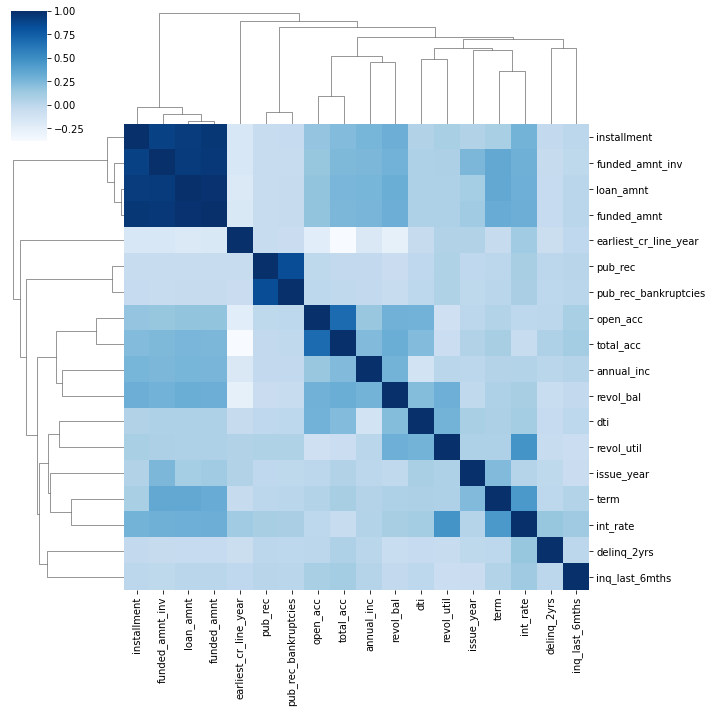

In [339]:
sns.clustermap(data=loan_data.corr(),cmap='Blues')
plt.show()

-------------

There seems to a high correlation between installments, investor funded amount , loan amount , funded amount. 
This means can analyse one of the columns and assume similar impact of other colums. 

There is also a good corretlation between pub_rec and pub_rec_bankruptcies

A correlation also exists between open_acc and total_acc

-------


**Lets start with loan amount**

We will evaluate if loan amounts play a role in determing if the borrower will default

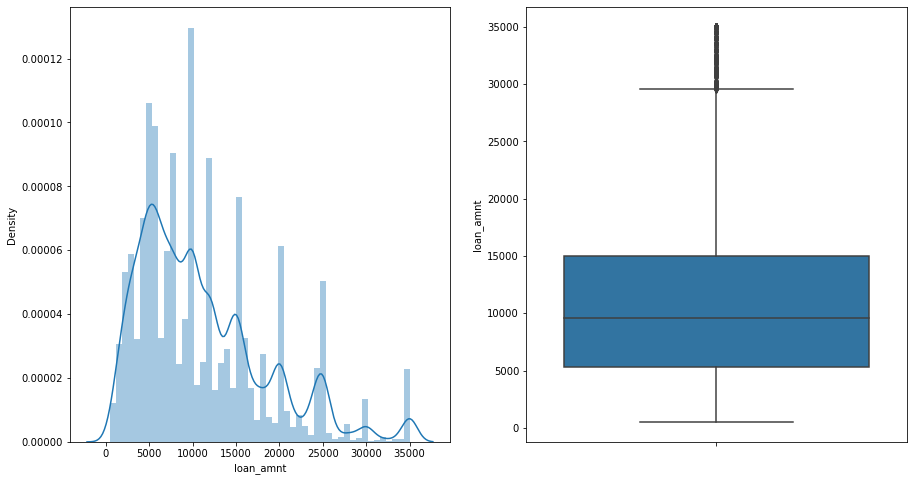

In [429]:
#let see the range of loan amounts 
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
sns.boxplot(y=loan_data.loan_amnt)
plt.subplot(1,2,1)
sns.distplot(loan_data.loan_amnt)
plt.show()
#max number loans are given between the range 5000 - 15,000

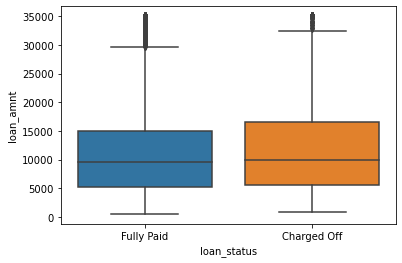

In [396]:
#there seems to be lot of outliers above 30,000, let us see what those rows are
#let us look at data below 15,000

sns.boxplot(data= loan_data, y='loan_amnt',x='loan_status')
plt.show()

In [407]:
#There seems to be minimal influnce, if we look at median loan amount of Charged Off it is slightly high.
loan_data.groupby(['loan_status']).loan_amnt.median()

loan_status
Charged Off    10000
Fully Paid      9600
Name: loan_amnt, dtype: int64

<AxesSubplot:xlabel='loan_status'>

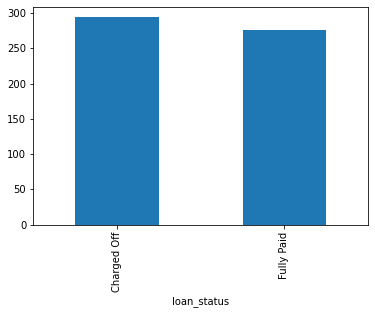

In [409]:
#Similar trend with the installments. This matches the assumtion we made when we looked at the correlation.
loan_data.groupby(['loan_status']).installment.median().plot.bar()

--------------

For Univariate Categorical analysis we should buckect the values and create categories. Since there are a lot of columns we can automate the task, let us create a fuction which will bucket the values into 5 categories 

--------

In [470]:
#creating a function to create 5 categories based on percentile,0%-20%, 20%-40%, 40%-60%, 60%-80% and 80%-100%
def create_categoies(data=loan_data, column, trailer=''):

    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

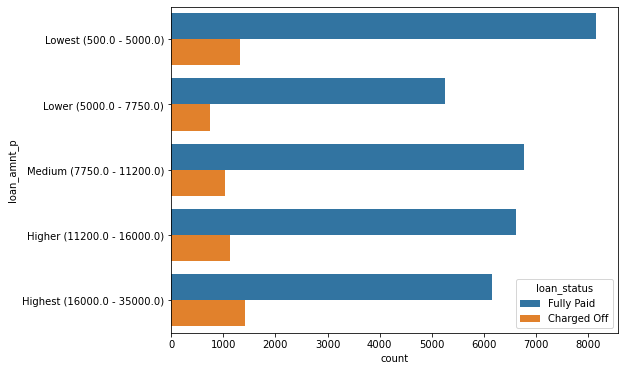

In [518]:
#let us bucket loan amount in to 5 categories.
create_categoies(column='loan_amnt')

#ploting 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, y='loan_amnt_p', hue='loan_status')
plt.show()

In [510]:
#let us see % of Charged off by categories.
loan_data.groupby(['loan_amnt_p'])['loan_status'].value_counts(normalize=True)

loan_amnt_p                  loan_status
Lowest (500.0 - 5000.0)      Fully Paid     0.861275
                             Charged Off    0.138725
Lower (5000.0 - 7750.0)      Fully Paid     0.876479
                             Charged Off    0.123521
Medium (7750.0 - 11200.0)    Fully Paid     0.868387
                             Charged Off    0.131613
Higher (11200.0 - 16000.0)   Fully Paid     0.854632
                             Charged Off    0.145368
Highest (16000.0 - 35000.0)  Fully Paid     0.812376
                             Charged Off    0.187624
Name: loan_status, dtype: float64

**Observation 1** Charged Off % is highest (18.76%) for when the loan amount are greated than 16,000.

Let us explore other numerical values.

In [520]:
#let us see list of columns and their data type
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   loan_amnt               38577 non-null  int64   
 1   funded_amnt             38577 non-null  int64   
 2   funded_amnt_inv         38577 non-null  float64 
 3   term                    38577 non-null  int64   
 4   int_rate                38577 non-null  float64 
 5   installment             38577 non-null  float64 
 6   grade                   38577 non-null  object  
 7   sub_grade               38577 non-null  object  
 8   emp_length              37544 non-null  object  
 9   home_ownership          38577 non-null  object  
 10  annual_inc              38577 non-null  float64 
 11  verification_status     38577 non-null  object  
 12  issue_d                 38577 non-null  object  
 13  loan_status             38577 non-null  object  
 14  purpose               

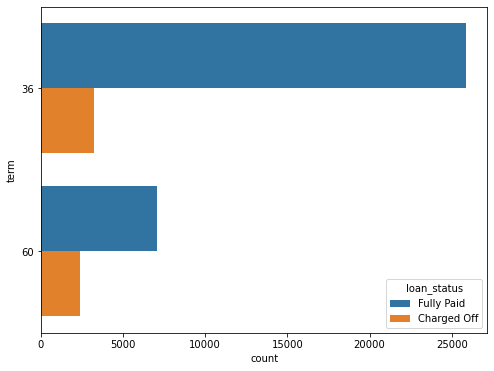

In [522]:
#lets analyize Term 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, y='term', hue='loan_status')
plt.show()

In [523]:
#let us look at the percentage
loan_data.groupby(['term'])['loan_status'].value_counts(normalize=True)

term  loan_status
36    Fully Paid     0.889091
      Charged Off    0.110909
60    Fully Paid     0.746862
      Charged Off    0.253138
Name: loan_status, dtype: float64

-------------

**Observation 2** Charged off % is higher (25%) when the load term is for 60 months(5 years)

---------------

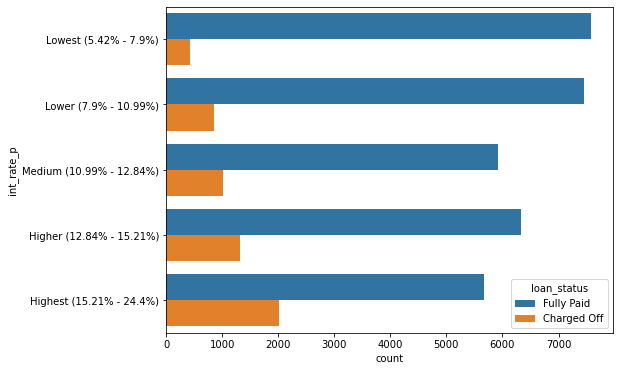

In [536]:
#let us review interest rate
#let us bucket interest rate in to 5 categories.
create_categoies(data=loan_data,column='int_rate',trailer='%')

#ploting 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, y='int_rate_p', hue='loan_status')
plt.show()

In [537]:
#let us look at the percentage
loan_data.groupby(['int_rate_p'])['loan_status'].value_counts(normalize=True)

int_rate_p                loan_status
Lowest (5.42% - 7.9%)     Fully Paid     0.946462
                          Charged Off    0.053538
Lower (7.9% - 10.99%)     Fully Paid     0.897124
                          Charged Off    0.102876
Medium (10.99% - 12.84%)  Fully Paid     0.853005
                          Charged Off    0.146995
Higher (12.84% - 15.21%)  Fully Paid     0.828381
                          Charged Off    0.171619
Highest (15.21% - 24.4%)  Fully Paid     0.737850
                          Charged Off    0.262150
Name: loan_status, dtype: float64

----------

**Observation 3** Charged Off % is the highest (26%) when the interest rates are high.

-----------

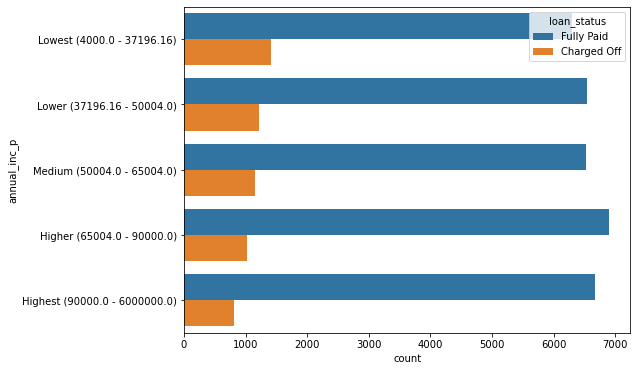

In [538]:
#let us review annual income
#let us bucket annual income in to 5 categories.
create_categoies(data=loan_data,column='annual_inc')

#ploting 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, y='annual_inc_p', hue='loan_status')
plt.show()


In [539]:
#let us look at the percentage
loan_data.groupby(['annual_inc_p'])['loan_status'].value_counts(normalize=True)

annual_inc_p                   loan_status
Lowest (4000.0 - 37196.16)     Fully Paid     0.816874
                               Charged Off    0.183126
Lower (37196.16 - 50004.0)     Fully Paid     0.843074
                               Charged Off    0.156926
Medium (50004.0 - 65004.0)     Fully Paid     0.850371
                               Charged Off    0.149629
Higher (65004.0 - 90000.0)     Fully Paid     0.870349
                               Charged Off    0.129651
Highest (90000.0 - 6000000.0)  Fully Paid     0.890715
                               Charged Off    0.109285
Name: loan_status, dtype: float64

---------

**Observation 4**  Charged of % is the highest (18%) for borrowers with low annual income

---------

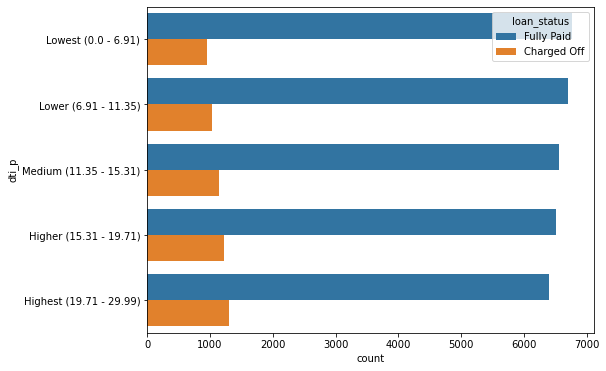

In [543]:
#let us review debt to income ratio
#let us bucket dti in to 5 categories.
create_categoies(data=loan_data,column='dti')

#ploting 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, y='dti_p', hue='loan_status')
plt.show()

In [544]:
#let us look at the percentage
loan_data.groupby(['dti_p'])['loan_status'].value_counts(normalize=True)

dti_p                    loan_status
Lowest (0.0 - 6.91)      Fully Paid     0.877591
                         Charged Off    0.122409
Lower (6.91 - 11.35)     Fully Paid     0.867373
                         Charged Off    0.132627
Medium (11.35 - 15.31)   Fully Paid     0.852391
                         Charged Off    0.147609
Higher (15.31 - 19.71)   Fully Paid     0.842092
                         Charged Off    0.157908
Highest (19.71 - 29.99)  Fully Paid     0.831147
                         Charged Off    0.168853
Name: loan_status, dtype: float64

--------------------

**Observation 5**  Charged of % is the highest (16%) for borrowers with high debt to income ration

-------------------------

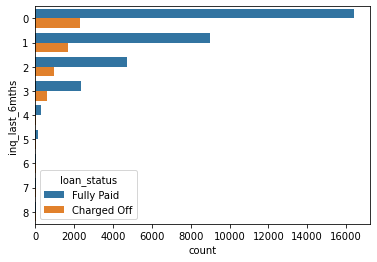

In [556]:
#let us plot data for loan inquiry over the last 6 months
sns.countplot(data=loan_data, y='inq_last_6mths', hue='loan_status')
plt.show()

In [555]:
loan_data.groupby(['inq_last_6mths'])['loan_status'].value_counts(normalize=True).sort_values()

inq_last_6mths  loan_status
0               Charged Off    0.121866
1               Charged Off    0.157317
4               Charged Off    0.161392
2               Charged Off    0.166785
5               Charged Off    0.194444
3               Charged Off    0.207509
8               Charged Off    0.214286
6               Charged Off    0.253968
7               Charged Off    0.294118
                Fully Paid     0.705882
6               Fully Paid     0.746032
8               Fully Paid     0.785714
3               Fully Paid     0.792491
5               Fully Paid     0.805556
2               Fully Paid     0.833215
4               Fully Paid     0.838608
1               Fully Paid     0.842683
0               Fully Paid     0.878134
Name: loan_status, dtype: float64

--------------------

**Observation 6**  Charged of % is the highest (29%) for borrowers who had made a lot of inquiries in the last 6 months.

-------------------------

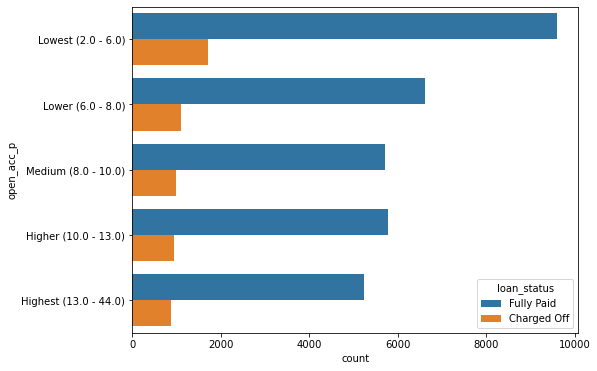

In [558]:
#let us review data for number of open accounts.
#let us bucket dti in to 5 categories.
create_categoies(data=loan_data,column='open_acc')

#ploting 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, y='open_acc_p', hue='loan_status')
plt.show()

In [560]:
#let us look at the percentage
loan_data.groupby(['open_acc_p'])['loan_status'].value_counts(normalize=True).sort_values()

open_acc_p             loan_status
Higher (10.0 - 13.0)   Charged Off    0.140795
Lower (6.0 - 8.0)      Charged Off    0.142820
Highest (13.0 - 44.0)  Charged Off    0.143746
Medium (8.0 - 10.0)    Charged Off    0.146629
Lowest (2.0 - 6.0)     Charged Off    0.151638
                       Fully Paid     0.848362
Medium (8.0 - 10.0)    Fully Paid     0.853371
Highest (13.0 - 44.0)  Fully Paid     0.856254
Lower (6.0 - 8.0)      Fully Paid     0.857180
Higher (10.0 - 13.0)   Fully Paid     0.859205
Name: loan_status, dtype: float64

In [561]:
#number of open credit lines does seem to factor much 

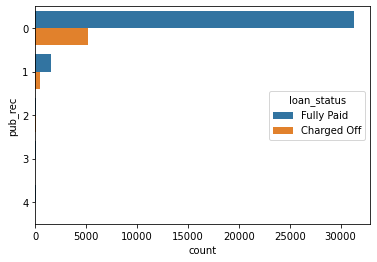

In [564]:
#let us plot Number of derogatory public records
sns.countplot(data=loan_data, y='pub_rec', hue='loan_status')
plt.show()

In [565]:
#let us look at the percentage
loan_data.groupby(['pub_rec'])['loan_status'].value_counts(normalize=True).sort_values()

pub_rec  loan_status
0        Charged Off    0.141343
2        Charged Off    0.208333
1        Charged Off    0.227024
         Fully Paid     0.772976
2        Fully Paid     0.791667
0        Fully Paid     0.858657
3        Fully Paid     1.000000
4        Fully Paid     1.000000
Name: loan_status, dtype: float64

--------------------

**Observation 7**  Charged of % is the higher (29%) for borrowers with higher number of erogatory public records.

-------------------------

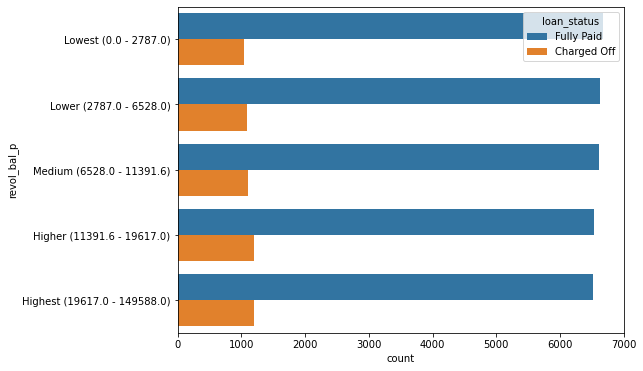

In [567]:
#let us review data for total revolving balance.
#let us bucket dti in to 5 categories.
create_categoies(data=loan_data,column='revol_bal')

#ploting 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, y='revol_bal_p', hue='loan_status')
plt.show()

In [568]:
#let us look at the percentage
loan_data.groupby(['revol_bal_p'])['loan_status'].value_counts(normalize=True).sort_values()

revol_bal_p                   loan_status
Lowest (0.0 - 2787.0)         Charged Off    0.135898
Lower (2787.0 - 6528.0)       Charged Off    0.141283
Medium (6528.0 - 11391.6)     Charged Off    0.142894
Higher (11391.6 - 19617.0)    Charged Off    0.154335
Highest (19617.0 - 149588.0)  Charged Off    0.154913
                              Fully Paid     0.845087
Higher (11391.6 - 19617.0)    Fully Paid     0.845665
Medium (6528.0 - 11391.6)     Fully Paid     0.857106
Lower (2787.0 - 6528.0)       Fully Paid     0.858717
Lowest (0.0 - 2787.0)         Fully Paid     0.864102
Name: loan_status, dtype: float64

--------------------

**Observation 8**  Charged of % is the higher (15.5%) for borrowers with revolving balance.

-------------------------

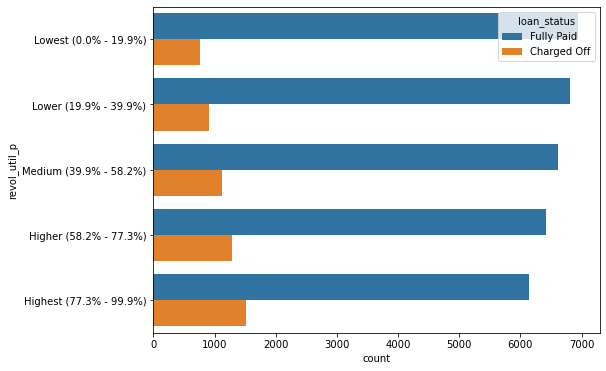

In [569]:
#let us review data for total revolving balance.
#let us bucket dti in to 5 categories.
create_categoies(data=loan_data,column='revol_util',trailer="%")

#ploting 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, y='revol_util_p', hue='loan_status')
plt.show()

In [570]:
#let us look at the percentage
loan_data.groupby(['revol_util_p'])['loan_status'].value_counts(normalize=True).sort_values()

revol_util_p             loan_status
Lowest (0.0% - 19.9%)    Charged Off    0.099417
Lower (19.9% - 39.9%)    Charged Off    0.118356
Medium (39.9% - 58.2%)   Charged Off    0.145001
Higher (58.2% - 77.3%)   Charged Off    0.167727
Highest (77.3% - 99.9%)  Charged Off    0.198069
                         Fully Paid     0.801931
Higher (58.2% - 77.3%)   Fully Paid     0.832273
Medium (39.9% - 58.2%)   Fully Paid     0.854999
Lower (19.9% - 39.9%)    Fully Paid     0.881644
Lowest (0.0% - 19.9%)    Fully Paid     0.900583
Name: loan_status, dtype: float64

--------------------

**Observation 9**  Charged of % is the higher (~20%) for borrowers have high utilization of their credit limit

-------------------------

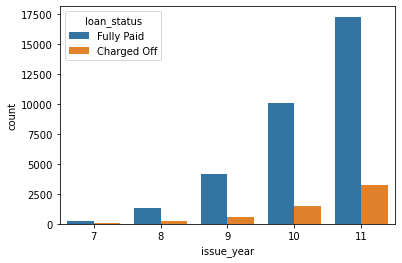

In [579]:
#let us review data for loans issue yearly
sns.countplot(data=loan_data,x='issue_year',hue='loan_status')
plt.show()

In [580]:
loan_data.groupby(['issue_year'])['loan_status'].value_counts(normalize=True).sort_values()

issue_year  loan_status
9           Charged Off    0.125954
10          Charged Off    0.128772
8           Charged Off    0.158131
11          Charged Off    0.158705
7           Charged Off    0.179283
            Fully Paid     0.820717
11          Fully Paid     0.841295
8           Fully Paid     0.841869
10          Fully Paid     0.871228
9           Fully Paid     0.874046
Name: loan_status, dtype: float64

**2007,2011 and 2008 have high charged off percentage, not sure, maybe more investigation is required.**

In [582]:
loan_data.earliest_cr_line_year.value_counts()

2000    3160
1999    2896
1998    2773
2001    2462
1997    2387
1996    2202
1995    2078
1994    1948
2002    1890
2003    1813
2004    1727
2005    1467
1993    1460
2006    1154
1992    1029
1990    1005
1991     945
1989     834
1988     709
2007     698
1987     590
1986     478
1985     439
1984     395
1983     322
1982     215
1981     181
1980     175
1978     161
1979     157
2008     153
1977     112
1976      93
1975      83
1974      62
1973      61
1972      49
1970      47
1971      45
1969      37
1968      19
1967      18
1966      11
1963      10
1965       8
1964       6
1962       5
1961       2
1954       2
1959       1
1946       1
1956       1
1950       1
Name: earliest_cr_line_year, dtype: int64

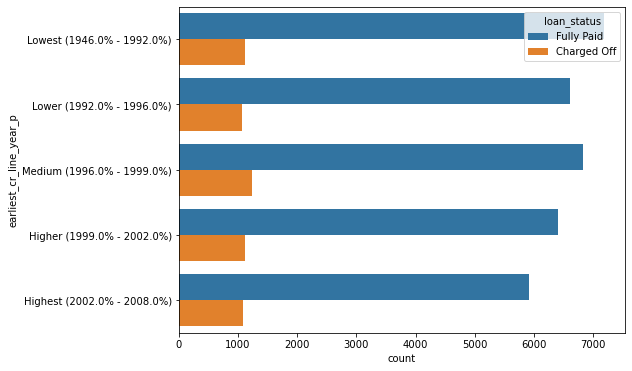

In [583]:
#let us review data for total revolving balance.
#let us bucket dti in to 5 categories.
create_categoies(data=loan_data,column='earliest_cr_line_year',trailer="%")

#ploting 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, y='earliest_cr_line_year_p', hue='loan_status')
plt.show()

In [586]:
loan_data.groupby(['earliest_cr_line_year_p'])['loan_status'].value_counts(normalize=True).sort_values()

earliest_cr_line_year_p      loan_status
Lowest (1946.0% - 1992.0%)   Charged Off    0.135275
Lower (1992.0% - 1996.0%)    Charged Off    0.139438
Higher (1999.0% - 2002.0%)   Charged Off    0.147897
Medium (1996.0% - 1999.0%)   Charged Off    0.152805
Highest (2002.0% - 2008.0%)  Charged Off    0.155305
                             Fully Paid     0.844695
Medium (1996.0% - 1999.0%)   Fully Paid     0.847195
Higher (1999.0% - 2002.0%)   Fully Paid     0.852103
Lower (1992.0% - 1996.0%)    Fully Paid     0.860562
Lowest (1946.0% - 1992.0%)   Fully Paid     0.864725
Name: loan_status, dtype: float64

--------------------

**Observation 10**  Charged off % is lower for borrowers who have had credit lines since longer time as compare the ones who have opened recently.

-------------------------

---------

**Let us now evaluate non numerical values.**

--------------

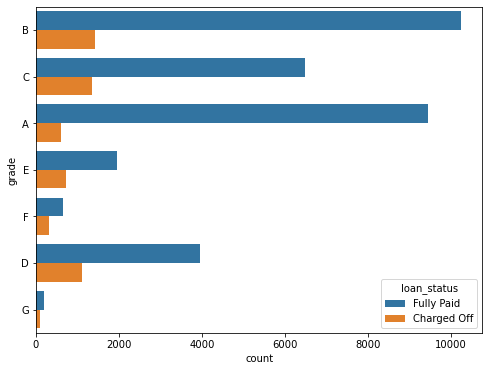

In [587]:
#ploting grade data 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, y='grade', hue='loan_status')
plt.show()

In [588]:
loan_data.groupby(['grade'])['loan_status'].value_counts(normalize=True).sort_values()

grade  loan_status
A      Charged Off    0.059930
B      Charged Off    0.122056
C      Charged Off    0.171943
D      Charged Off    0.219862
E      Charged Off    0.268494
F      Charged Off    0.326844
G      Charged Off    0.337793
       Fully Paid     0.662207
F      Fully Paid     0.673156
E      Fully Paid     0.731506
D      Fully Paid     0.780138
C      Fully Paid     0.828057
B      Fully Paid     0.877944
A      Fully Paid     0.940070
Name: loan_status, dtype: float64

--------------------

**Observation 11**  Charged off % is higer for lower grade - E,F,G

-------------------------

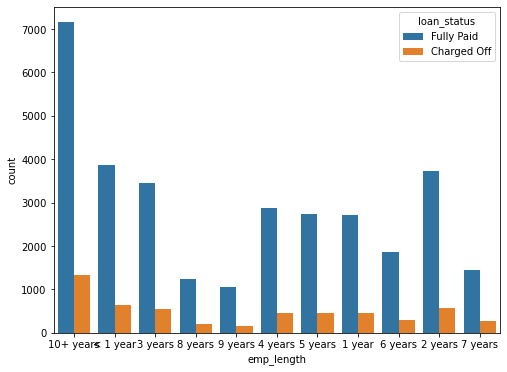

In [593]:
#plotting lenght of employement
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, x='emp_length', hue='loan_status')
plt.show()

In [594]:
loan_data.groupby(['emp_length'])['loan_status'].value_counts(normalize=True).sort_values()

emp_length  loan_status
9 years     Charged Off    0.128874
2 years     Charged Off    0.132137
4 years     Charged Off    0.138241
3 years     Charged Off    0.138335
8 years     Charged Off    0.141463
6 years     Charged Off    0.141605
< 1 year    Charged Off    0.141748
5 years     Charged Off    0.143394
1 year      Charged Off    0.143894
7 years     Charged Off    0.153711
10+ years   Charged Off    0.156810
            Fully Paid     0.843190
7 years     Fully Paid     0.846289
1 year      Fully Paid     0.856106
5 years     Fully Paid     0.856606
< 1 year    Fully Paid     0.858252
6 years     Fully Paid     0.858395
8 years     Fully Paid     0.858537
3 years     Fully Paid     0.861665
4 years     Fully Paid     0.861759
2 years     Fully Paid     0.867863
9 years     Fully Paid     0.871126
Name: loan_status, dtype: float64

**A little surprised by data seeing that folks with 10 years defaulting, need more data or investigation**

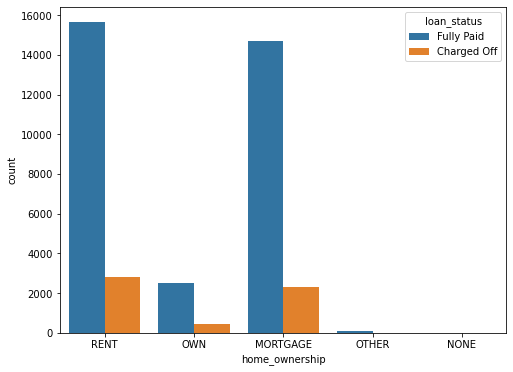

In [595]:
#let us plot home ownership 
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, x='home_ownership', hue='loan_status')
plt.show() 

In [596]:
loan_data.groupby(['home_ownership'])['loan_status'].value_counts(normalize=True).sort_values()

home_ownership  loan_status
MORTGAGE        Charged Off    0.136713
OWN             Charged Off    0.148908
RENT            Charged Off    0.153626
OTHER           Charged Off    0.183673
                Fully Paid     0.816327
RENT            Fully Paid     0.846374
OWN             Fully Paid     0.851092
MORTGAGE        Fully Paid     0.863287
NONE            Fully Paid     1.000000
Name: loan_status, dtype: float64

--------------------

**Observation 12**  Charged off % is slighlty highert for borrowers who are renting, however it is the highest for the category "OTHER"
need more data on thst.

-------------------------

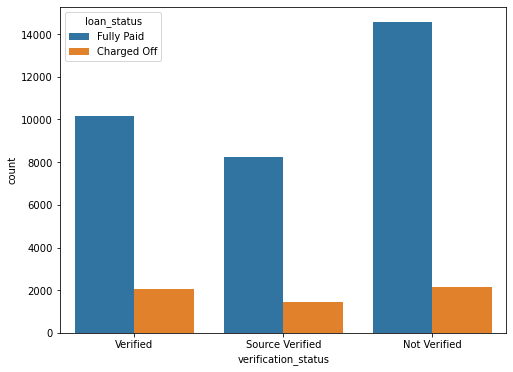

verification_status  loan_status
Not Verified         Charged Off    0.128310
Source Verified      Charged Off    0.148186
Verified             Charged Off    0.168032
                     Fully Paid     0.831968
Source Verified      Fully Paid     0.851814
Not Verified         Fully Paid     0.871690
Name: loan_status, dtype: float64

In [600]:
plt.subplots(figsize=(8,6))
sns.countplot(data=loan_data, x='verification_status', hue='loan_status')
plt.show() 
loan_data.groupby(['verification_status'])['loan_status'].value_counts(normalize=True).sort_values()

--------------------

**Observation 13**  **Very very interesting** Verfied borrowers default the most, this should be investigated.


-------------------------

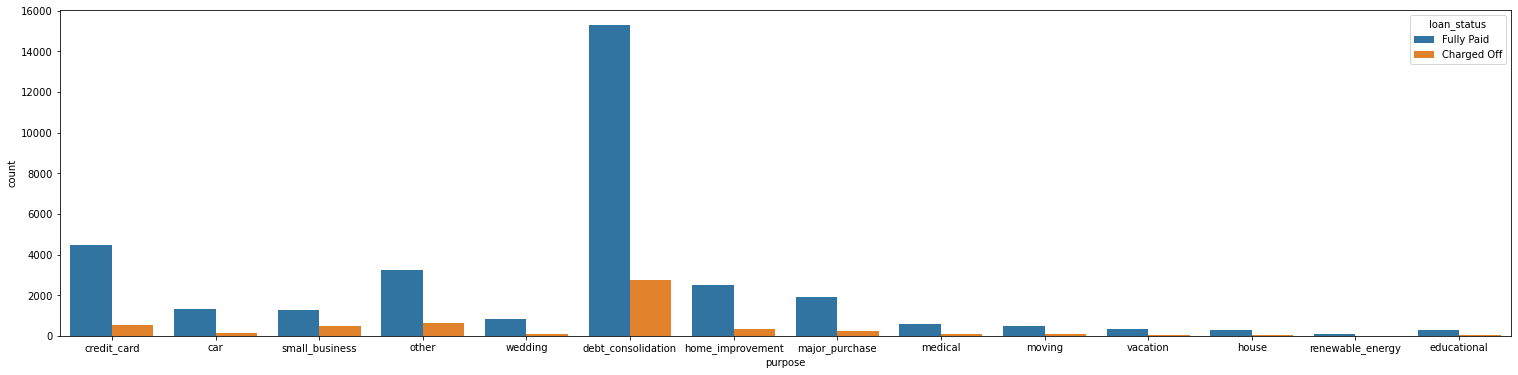

purpose             loan_status
major_purchase      Charged Off    0.103256
wedding             Charged Off    0.103672
car                 Charged Off    0.106738
credit_card         Charged Off    0.107818
home_improvement    Charged Off    0.120696
vacation            Charged Off    0.141333
debt_consolidation  Charged Off    0.153254
medical             Charged Off    0.155653
moving              Charged Off    0.159722
house               Charged Off    0.160763
other               Charged Off    0.163777
educational         Charged Off    0.172308
renewable_energy    Charged Off    0.186275
small_business      Charged Off    0.270810
                    Fully Paid     0.729190
renewable_energy    Fully Paid     0.813725
educational         Fully Paid     0.827692
other               Fully Paid     0.836223
house               Fully Paid     0.839237
moving              Fully Paid     0.840278
medical             Fully Paid     0.844347
debt_consolidation  Fully Paid     0.846746


In [603]:
plt.subplots(figsize=(26,6))
sns.countplot(data=loan_data, x='purpose', hue='loan_status')
plt.show() 
loan_data.groupby(['purpose'])['loan_status'].value_counts(normalize=True).sort_values()

--------------------

**Observation 14**  Loans for education, renewable enery and small business have a high chance of getting charged off.


-------------------------

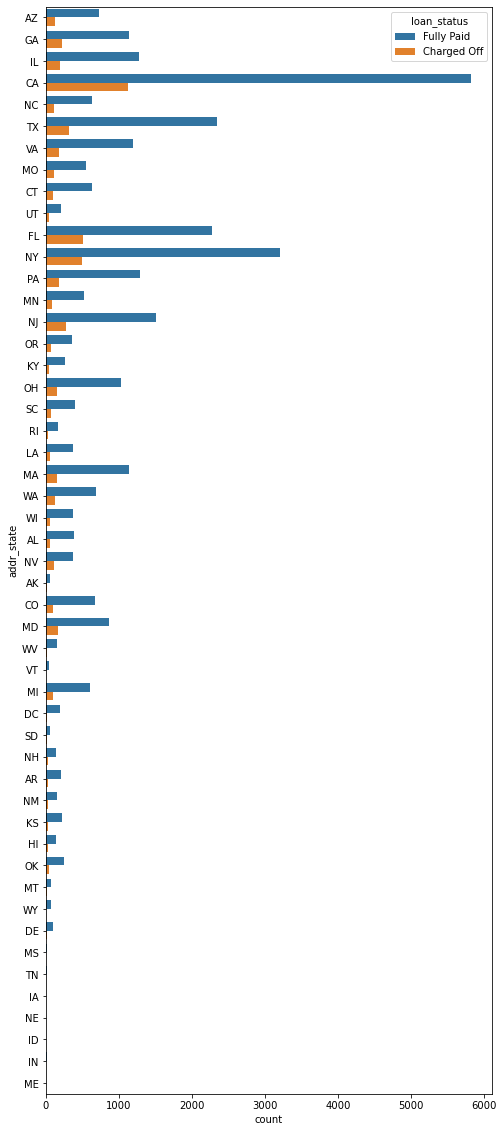

In [618]:
plt.subplots(figsize=(8,20))
sns.countplot(data=loan_data, y='addr_state', hue='loan_status')
plt.show() 

In [613]:
df = loan_data.groupby(['addr_state'])['loan_status'].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values('addr_state')

In [614]:
df

,addr_state,loan_status,Charged off %
0,AK,Fully Paid,0.807692
1,AK,Charged Off,0.192308
2,AL,Fully Paid,0.875862
3,AL,Charged Off,0.124138
4,AR,Fully Paid,0.885106
...,...,...,...
92,WI,Charged Off,0.143182
93,WV,Fully Paid,0.877907
94,WV,Charged Off,0.122093
95,WY,Fully Paid,0.950000


In [617]:
df[df['loan_status']=='Charged Off'].sort_values(by='Charged off %',ascending=False)

,addr_state,loan_status,Charged off %
53,NE,Charged Off,0.600000
62,NV,Charged Off,0.225470
78,SD,Charged Off,0.193548
1,AK,Charged Off,0.192308
19,FL,Charged Off,0.181230
46,MO,Charged Off,0.170149
23,HI,Charged Off,0.168675
26,ID,Charged Off,0.166667
60,NM,Charged Off,0.163934
70,OR,Charged Off,0.163218


--------------------

**Observation 15**  states NE has the highest charged off % followed by NV, SD, AK


-------------------------

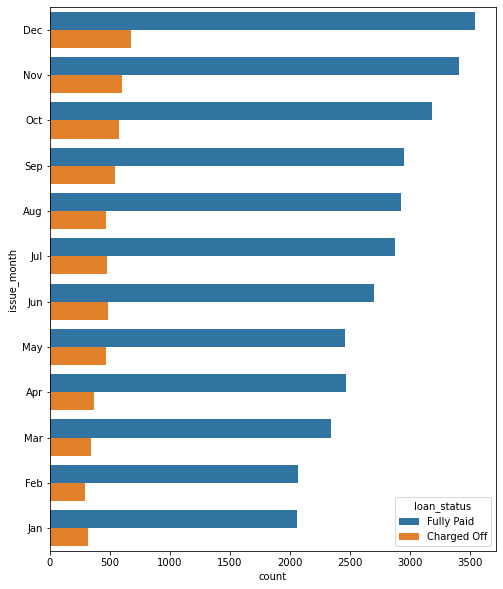

In [621]:
#let us plot data for issue month

plt.subplots(figsize=(8,10))
sns.countplot(data=loan_data, y='issue_month', hue='loan_status')
plt.show() 


In [622]:
df = loan_data.groupby(['issue_month'])['loan_status'].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values('issue_month')
df[df['loan_status']=='Charged Off'].sort_values(by='Charged off %',ascending=False)

,issue_month,loan_status,Charged off %
5,Dec,Charged Off,0.160854
17,May,Charged Off,0.159644
23,Sep,Charged Off,0.156375
21,Oct,Charged Off,0.154214
13,Jun,Charged Off,0.151887
19,Nov,Charged Off,0.149276
11,Jul,Charged Off,0.142942
3,Aug,Charged Off,0.138135
9,Jan,Charged Off,0.134931
1,Apr,Charged Off,0.130696


--------------------

**Observation 16**  Loans issues in Dec, May, Set & Oct have higher charged off %. December is holiday season so folks maybe taking some vacation loan, not sure about May. Have to investigate what is special in May.


-------------------------

# Bivariate Analysis.

let us now evaluate 2 variables and see their impact on loan status.

In [685]:
#let us change loan status to a numeric, 1 for charged off and 0 for fully paid.
loan_data['loan_status_new'] = loan_data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

-------------

we were surprised above that > 10 years of work experience were defaulting more, let us see if we can come up with data to understand why that is happening

-------

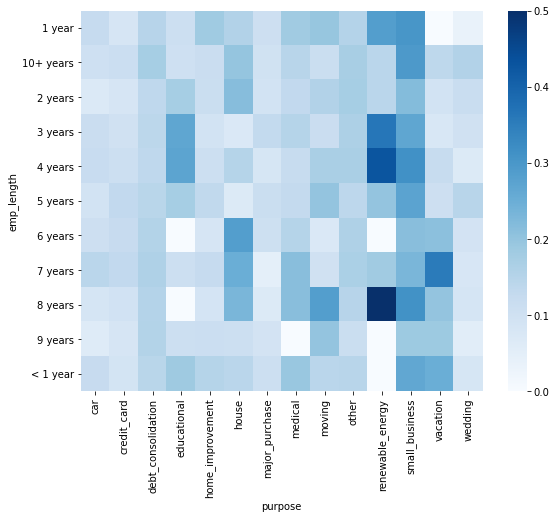

In [686]:
plt.figure(figsize=[9,7])
pivot_table = pd.pivot_table(data=loan_data, values='loan_status_new', index = 'emp_length',columns='purpose')
sns.heatmap(pivot_table,cmap='Blues')
plt.show()

--------------------

**Observation 16**  While we do not find a clear corelation between the impact of employee lenght and purpose on loan status, however we see that small business has the higher chances of charged off accross the employee experience.

3-4 years experience have higher charged off for educational loans and renewable energy as well.
6-8 years experience have higher charged off for house loans and renewable energy as well.
6-9 years also default on loans taken for vacations, maybe they are going on more expensive vacations.

-------------------------

In [688]:
#creating a function to generate heatmaps
def create_heatmap(index,columns):
    plt.figure(figsize=[9,7])
    pivot_table = pd.pivot_table(data=loan_data, values='loan_status_new', index = index,columns=columns)
    sns.heatmap(pivot_table,cmap='Blues')
    plt.show()

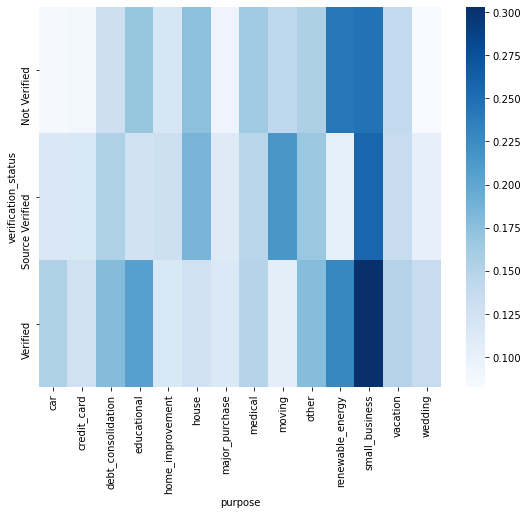

In [689]:
#the other confusion we had above was that the verified borrows were getting charged off. let us see the purpose
create_heatmap(index='verification_status',columns='purpose')

--------------------

**Observation 17**  The verification process seems to be broken for small business, verified small business default more as compared to unverified 

-------------------------

In [668]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   loan_amnt                38577 non-null  int64   
 1   funded_amnt              38577 non-null  int64   
 2   funded_amnt_inv          38577 non-null  float64 
 3   term                     38577 non-null  int64   
 4   int_rate                 38577 non-null  float64 
 5   installment              38577 non-null  float64 
 6   grade                    38577 non-null  object  
 7   sub_grade                38577 non-null  object  
 8   emp_length               37544 non-null  object  
 9   home_ownership           38577 non-null  object  
 10  annual_inc               38577 non-null  float64 
 11  verification_status      38577 non-null  object  
 12  issue_d                  38577 non-null  object  
 13  loan_status              38577 non-null  object  
 14  purpos

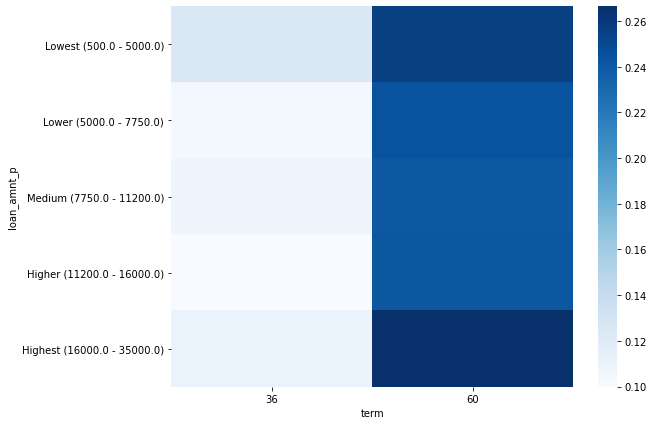

In [674]:
#let us see if loan amount can be analysed with other variable to provide any insights
create_heatmap(index='loan_amnt_p',columns='term')
#the below map indicates that term effects the charged off %, loan amount in it self doesn't seem to be the problem

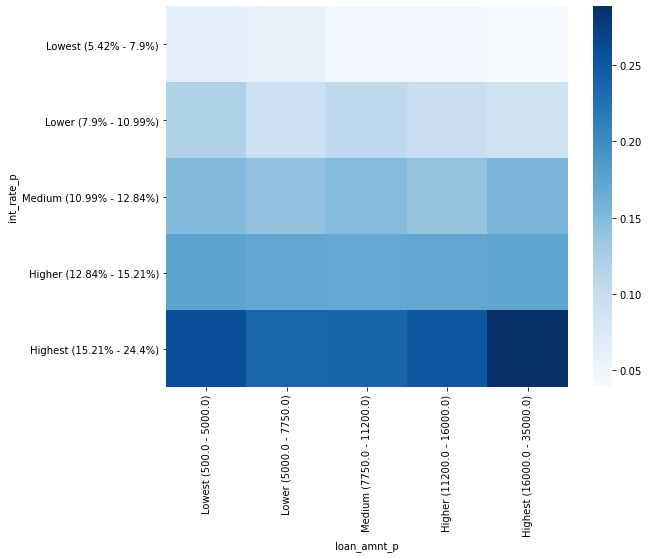

In [690]:
#let us look at loan along with interest rate
create_heatmap(index='int_rate_p',columns='loan_amnt_p')
#This indicates that high interest rate can lead to defaults.

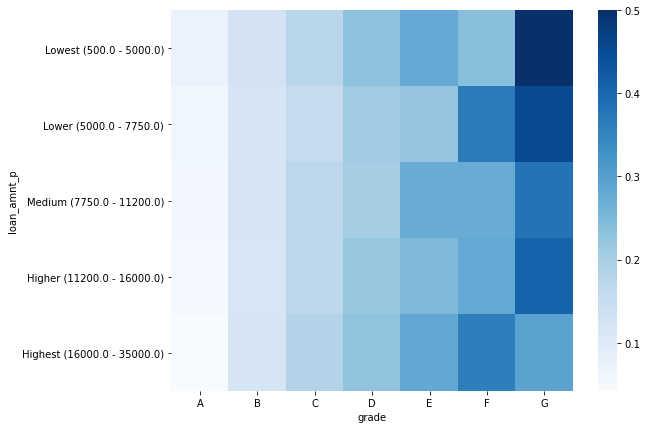

In [680]:
#let us look at loan along with grade
create_heatmap(index='loan_amnt_p',columns='grade')
#low loan amounts for grade G seems to default the most, interesting. we should explore Grade as well.

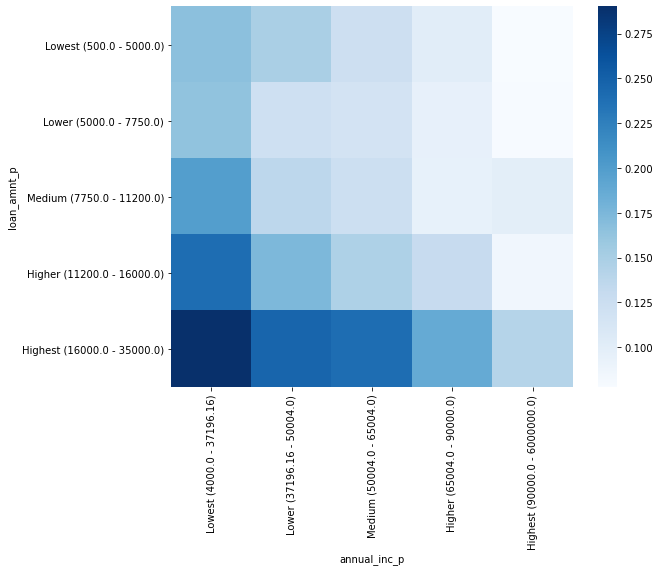

In [683]:
#let us look at loan along with someone's income.
create_heatmap(index='loan_amnt_p',columns='annual_inc_p')

--------------------

**Observation 18**  High loan amounts to lower income borrowers have a high chance of defaulting.

-------------------------

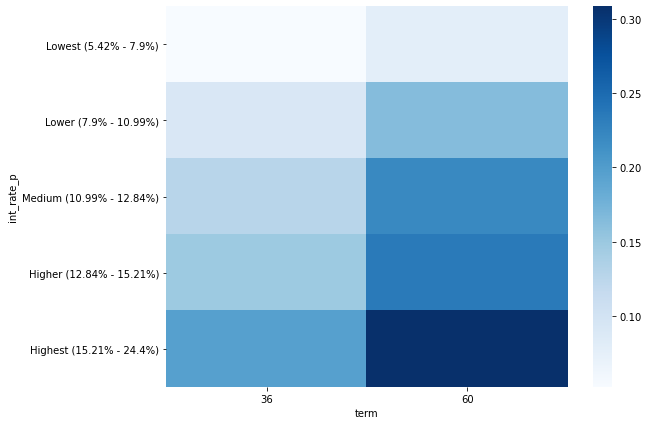

In [684]:
#let us analyse interest rate now,
create_heatmap(index='int_rate_p',columns='term')

--------------------

**Observation 19**  High interest rate for long term loan seems to be increasing charged off loans.
interest should also be analzyed, however let us first explore term and see if can provide some insights.

-------------------------

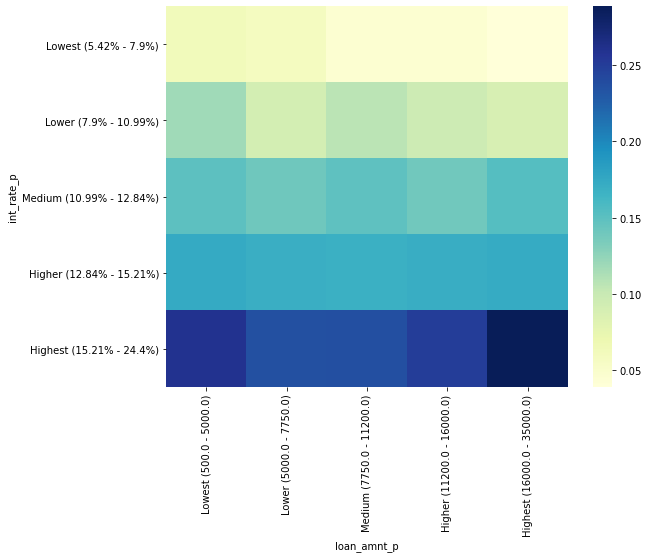

In [647]:
create_heatmap(index='int_rate_p',columns='loan_amnt_p')
#Expected as we saw high interest has higher charged off %

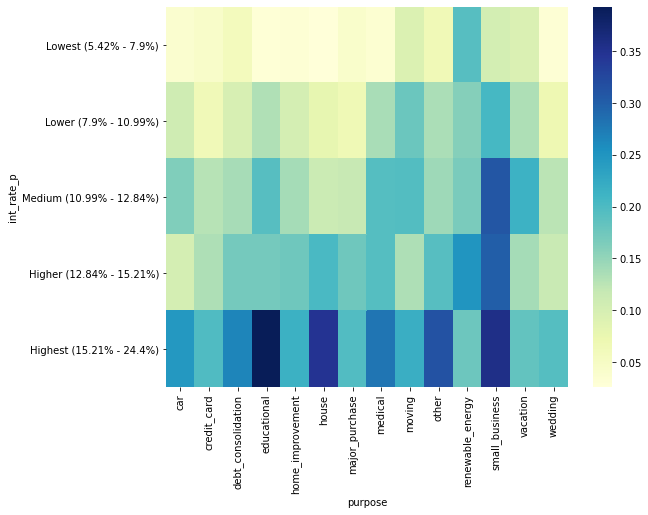

In [648]:
create_heatmap(index='int_rate_p',columns='purpose')

--------------------

**Observation 19**  High interest rate for loans for eduction, house and small business can lead to higher charged off

-------------------------

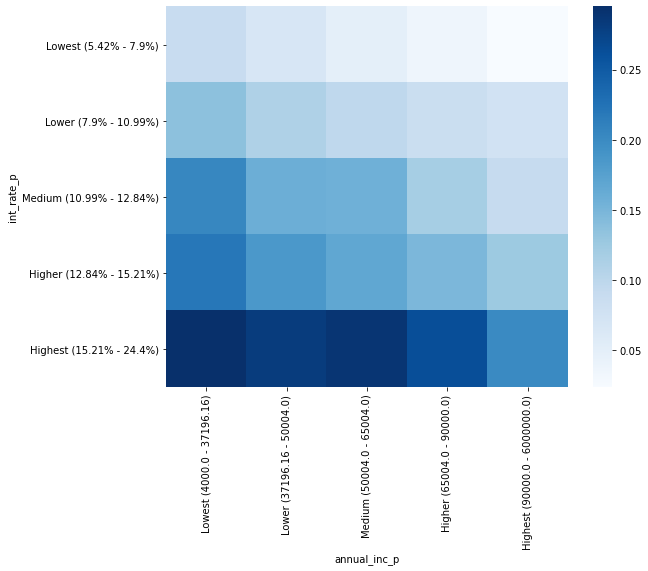

In [692]:
create_heatmap(index='int_rate_p',columns='annual_inc_p')

--------------------

**Observation 20**  High interest rate for low income groups can lead to higher charged off

-------------------------

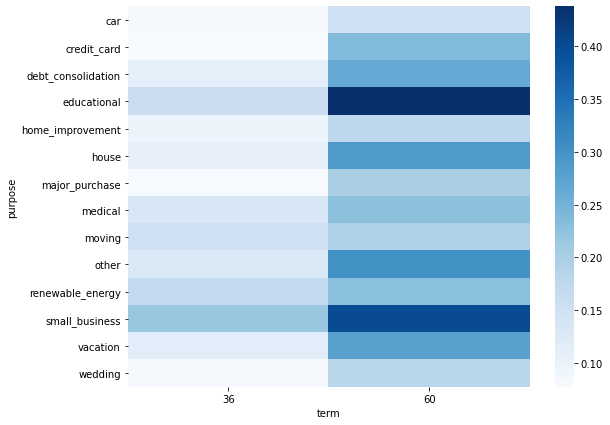

In [697]:
#let us know investigate term further
create_heatmap(index='purpose',columns='term')

--------------------

**Observation 21**  Long term educational and small business loans are risky

-------------------------

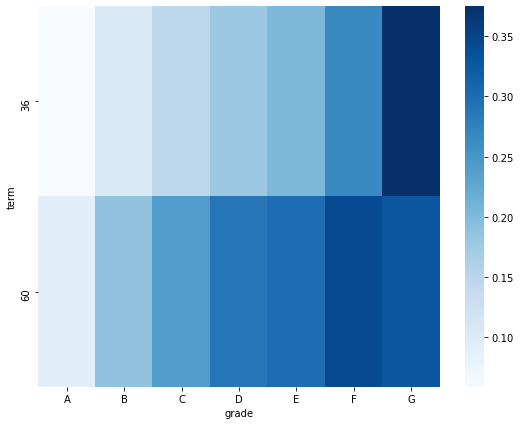

In [698]:
create_heatmap(index='term',columns='grade')

--------------------

**Observation 21**  Short term G grade Loans are risky. 

-------------------------

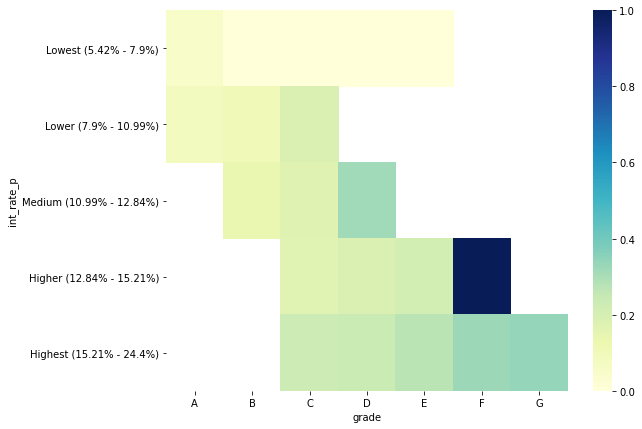

In [657]:
# Let us explore grade
create_heatmap(index='int_rate_p',columns='grade')

--------------------

**Observation 22**  Grade F loans for 12.84 - 15.21 have higher charged off. This is interesting as interest rates higher than that have lower charg off, not sure why. More investivation is required

-------------------------

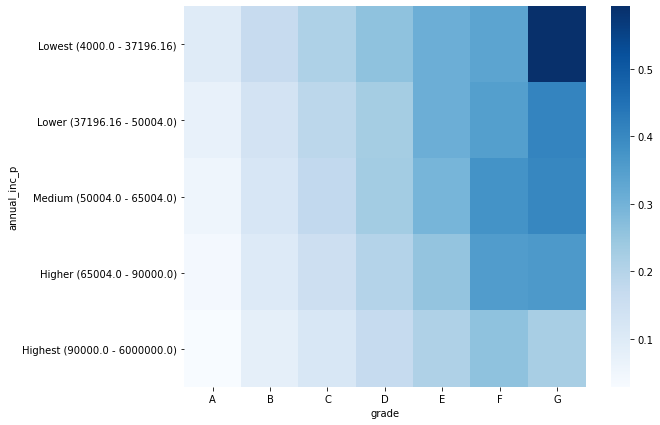

In [705]:
create_heatmap(index='annual_inc_p',columns='grade')

--------------------

**Observation 23**  Grade G loans for lowest income group have high chance of charged off

-----------------------

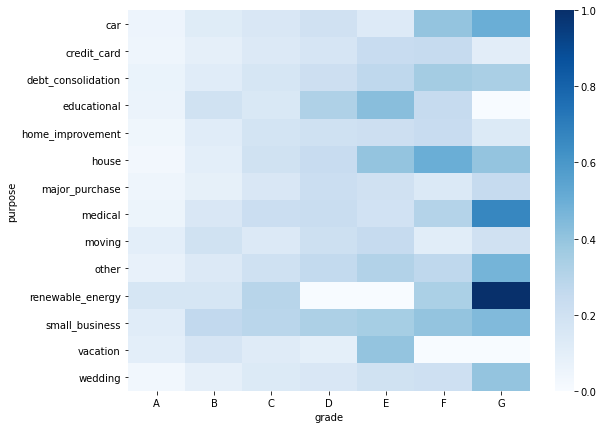

In [706]:
create_heatmap(index='purpose',columns='grade')

--------------------

**Observation 23**  Grade G loans given for renewable energy and medical have a very high chance of default

-----------------------

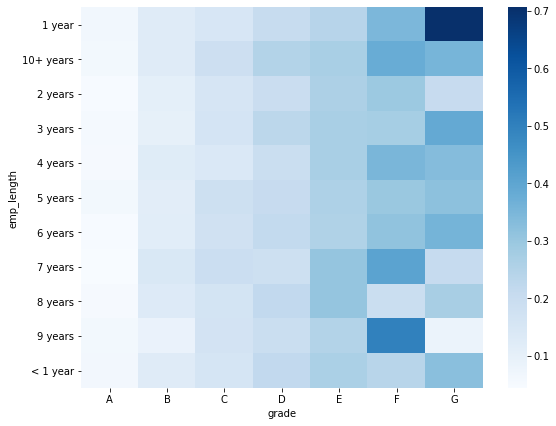

In [708]:
create_heatmap(index='emp_length',columns='grade')

--------------------

**Observation 23**  Grade G loans given for less employement experience has very high chance of default

-----------------------

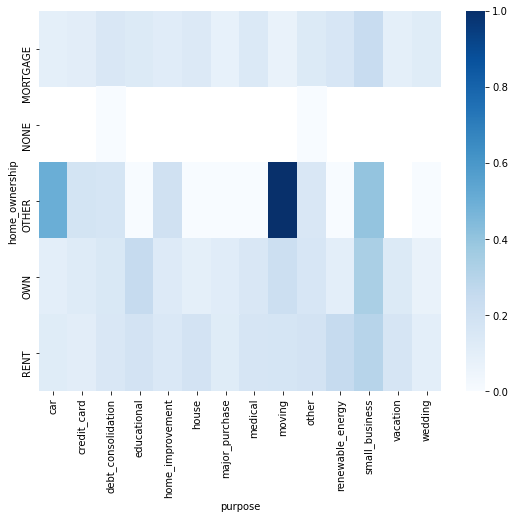

In [709]:
#let us now look at home ownership
create_heatmap(index='home_ownership',columns='purpose')

--------------------

**Observation 24**  Folks who have classify their living status as other then to default more for loans taken for moving.

-----------------------

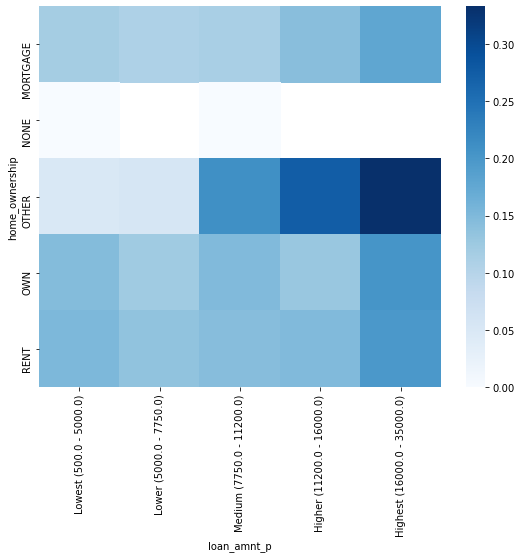

In [710]:
create_heatmap(index='home_ownership',columns='loan_amnt_p')

--------------------

**Observation 25**  Folks who have classify their living status as other tend to default more for higher loan amounts.

-----------------------

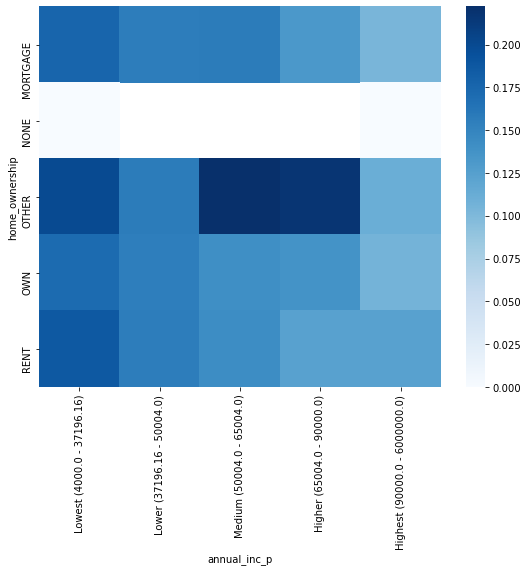

In [711]:
#let us check verification process
create_heatmap(index='home_ownership',columns='annual_inc_p')

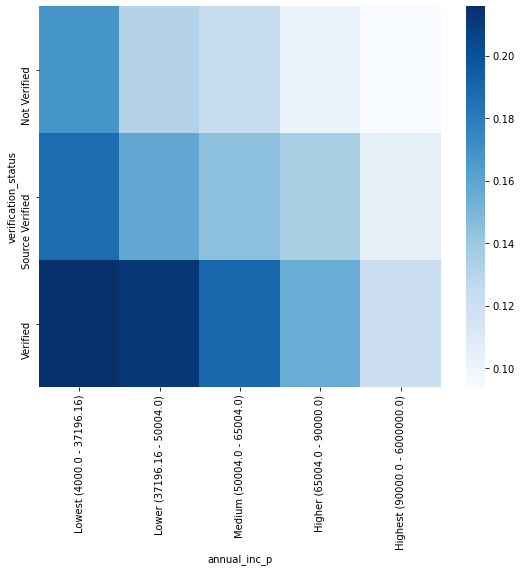

In [712]:
create_heatmap(index='verification_status',columns='annual_inc_p')

--------------------

**Observation 26**  Low income folks who are verified default the most.

-----------------------

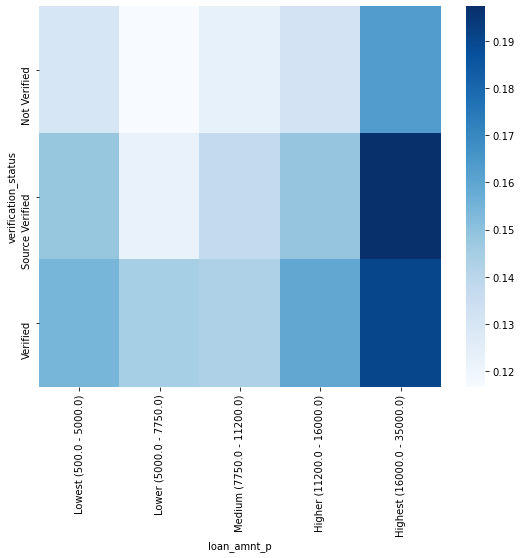

In [713]:
create_heatmap(index='verification_status',columns='loan_amnt_p')

--------------------

**Observation 27**  Highest loan amouts which are verified or have source verified default the most.

-----------------------

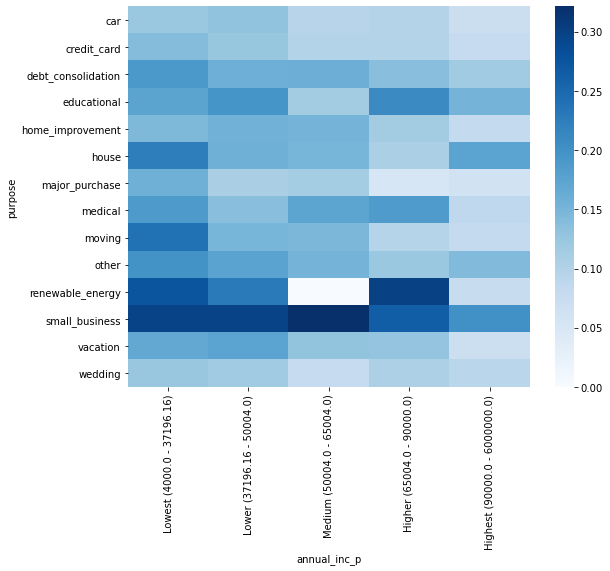

In [714]:
create_heatmap(index='purpose',columns='annual_inc_p')

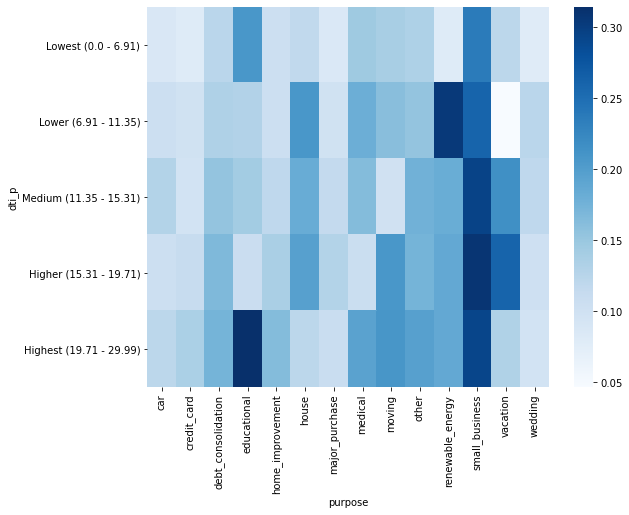

In [717]:
#let us look at DTI
create_heatmap(index='dti_p',columns='purpose')

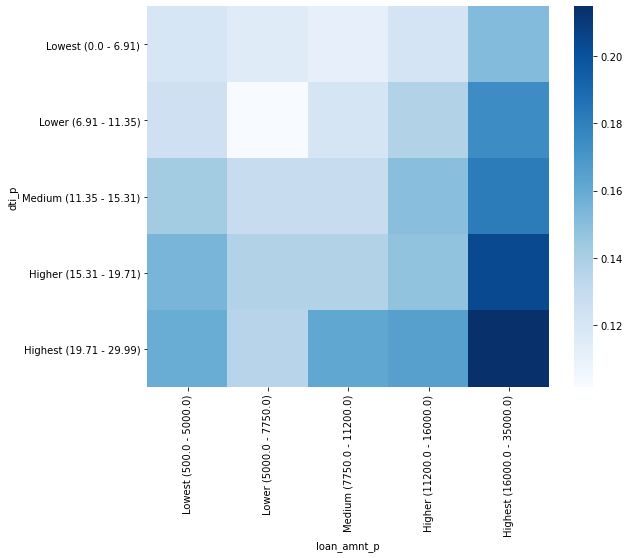

In [752]:
create_heatmap(index='dti_p',columns='loan_amnt_p')

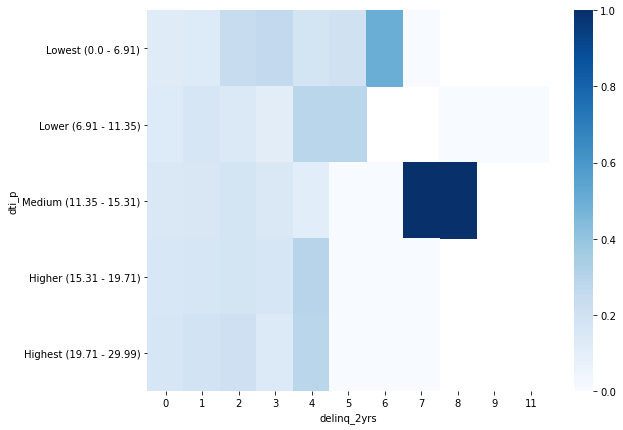

In [755]:
create_heatmap(index='dti_p',columns='delinq_2yrs')

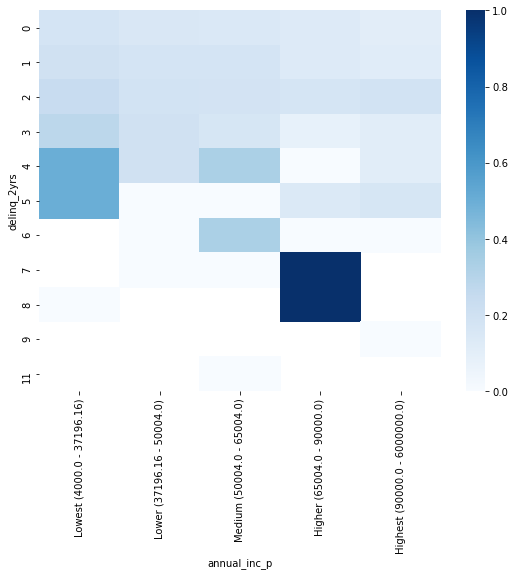

In [720]:
create_heatmap(index='delinq_2yrs',columns='annual_inc_p')

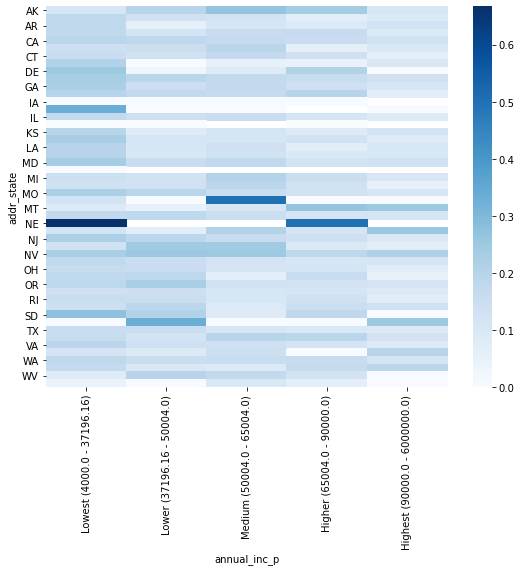

In [721]:
create_heatmap(index='addr_state',columns='annual_inc_p')

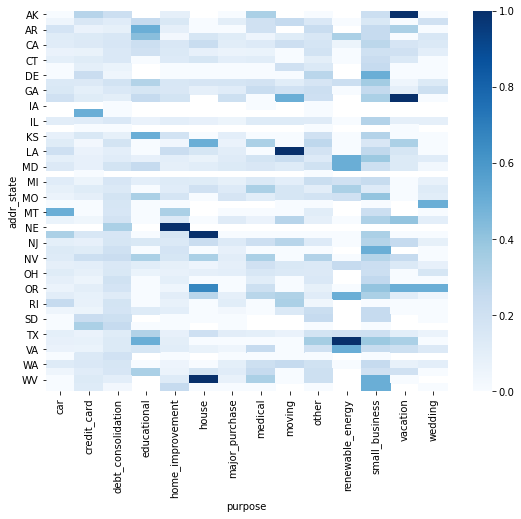

In [722]:
create_heatmap(index='addr_state',columns='purpose')

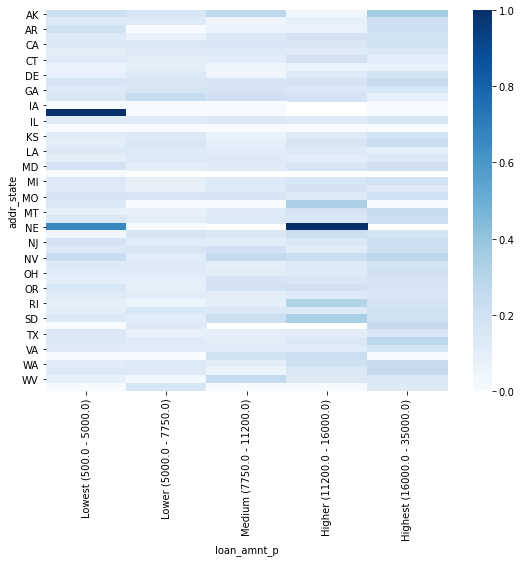

In [723]:
create_heatmap(index='addr_state',columns='loan_amnt_p')

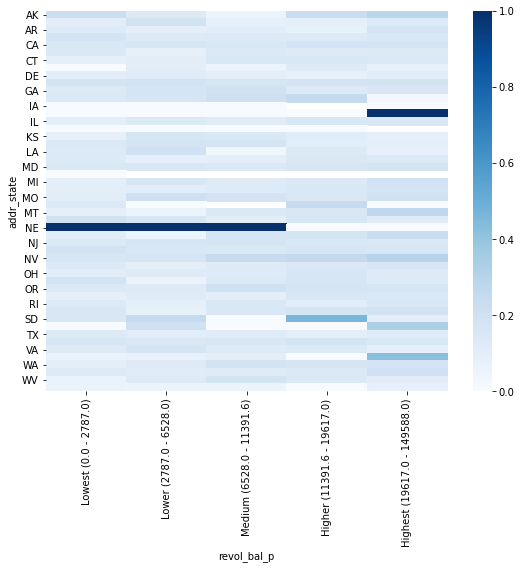

In [725]:
create_heatmap(index='addr_state',columns='revol_bal_p')

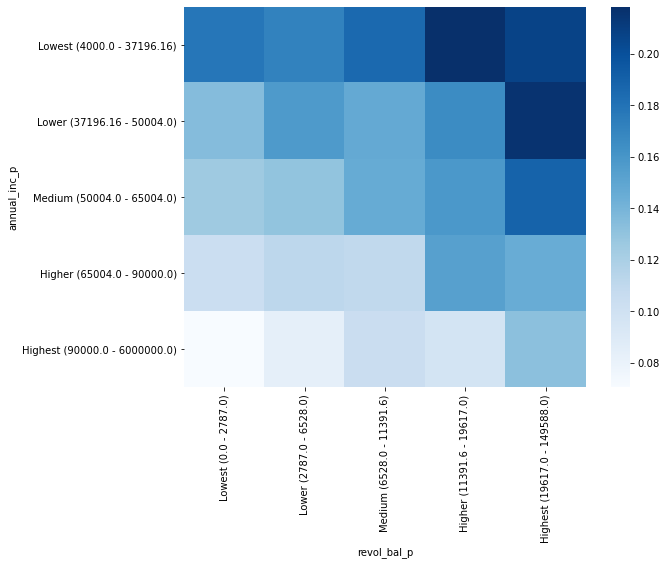

In [726]:
create_heatmap(index='annual_inc_p',columns='revol_bal_p')

-------------------

**Observation** High revolving balance for low income borrowers have higher risk

______________________

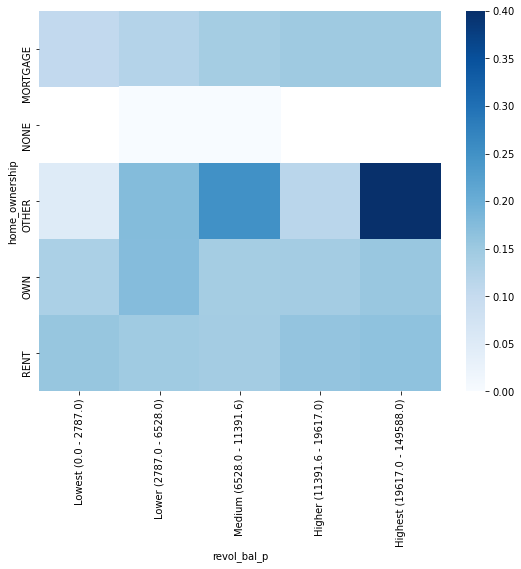

In [733]:
create_heatmap(index='home_ownership',columns='revol_bal_p')

-------------------

**Observation** High revolving balance for home ownership classified as Other have higher risk

______________________

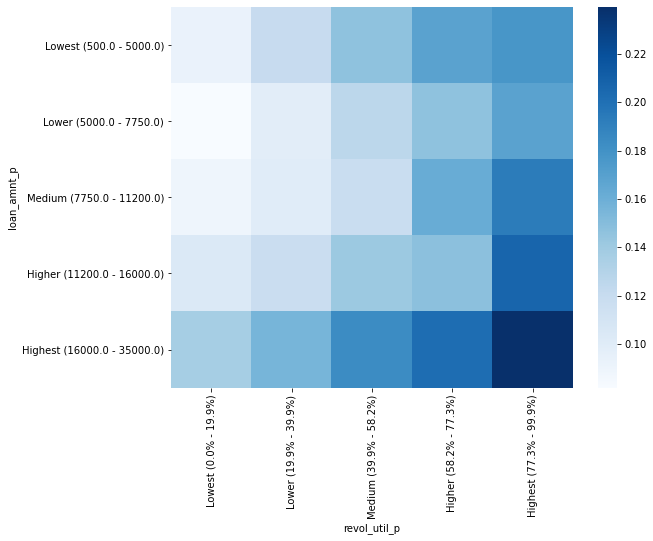

In [735]:
create_heatmap(index='loan_amnt_p',columns='revol_util_p')

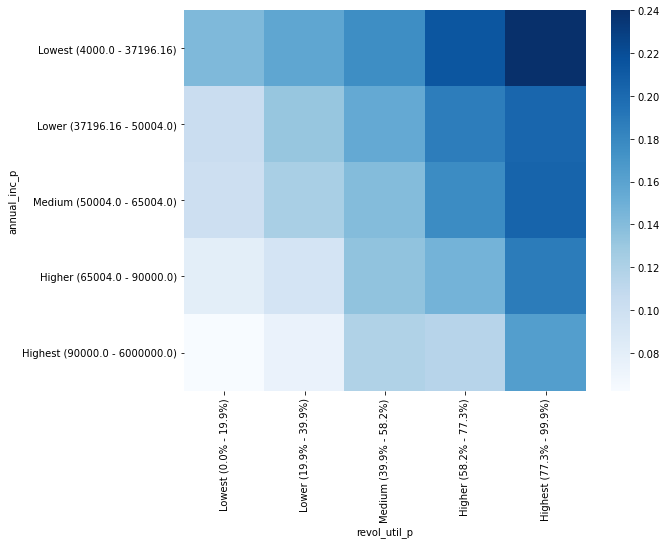

In [736]:
create_heatmap(index='annual_inc_p',columns='revol_util_p')

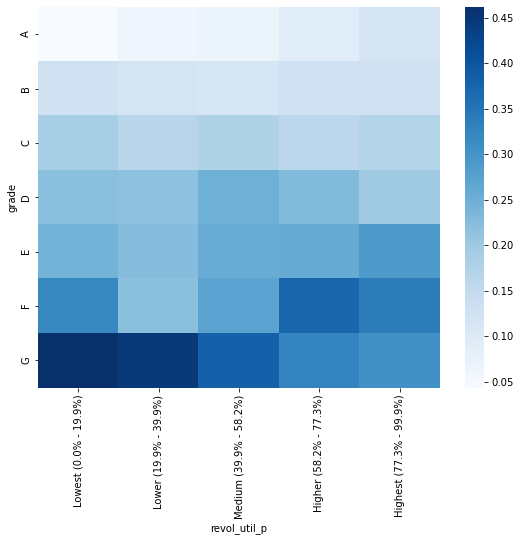

In [740]:
create_heatmap(index='grade',columns='revol_util_p')

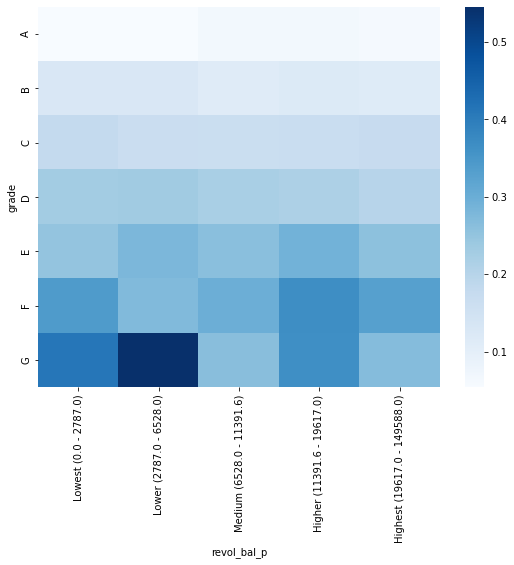

In [741]:
create_heatmap(index='grade',columns='revol_bal_p')

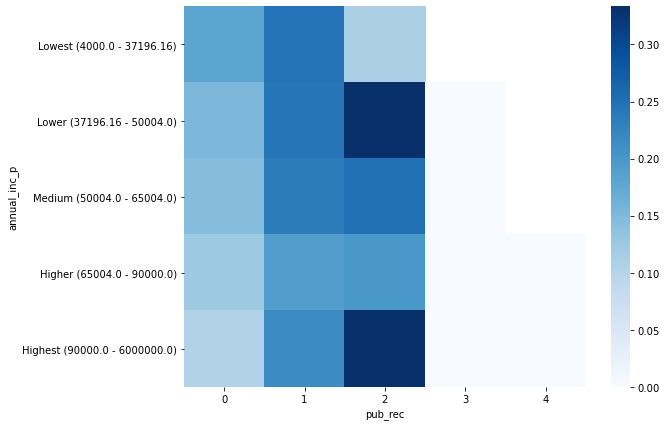

In [743]:

create_heatmap(index='annual_inc_p',columns='pub_rec')

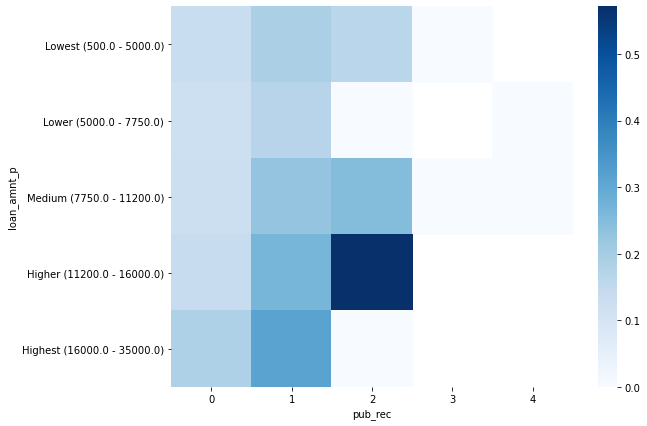

In [744]:
create_heatmap(index='loan_amnt_p',columns='pub_rec')

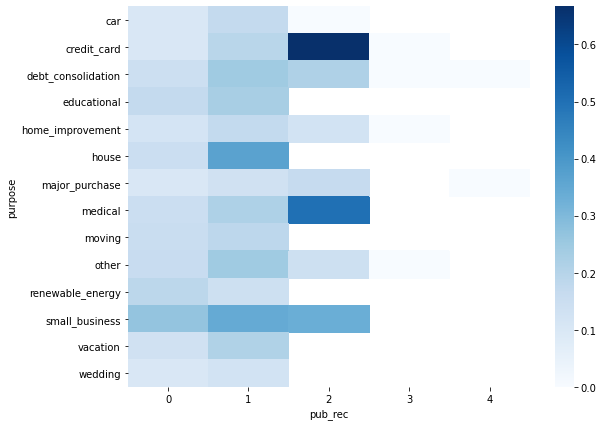

In [745]:
create_heatmap(index='purpose',columns='pub_rec')

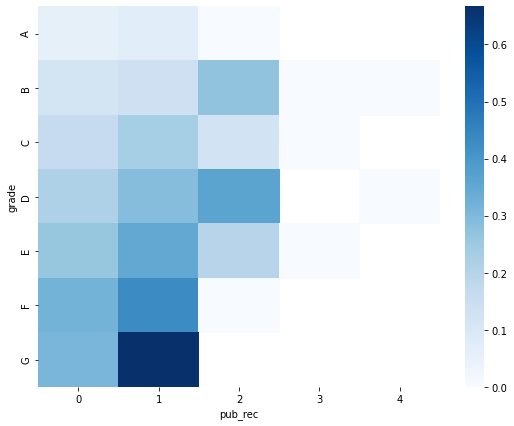

In [746]:
create_heatmap(index='grade',columns='pub_rec')

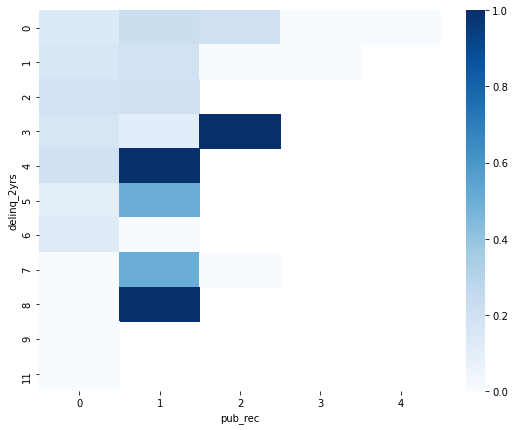

In [747]:
create_heatmap(index='delinq_2yrs',columns='pub_rec')

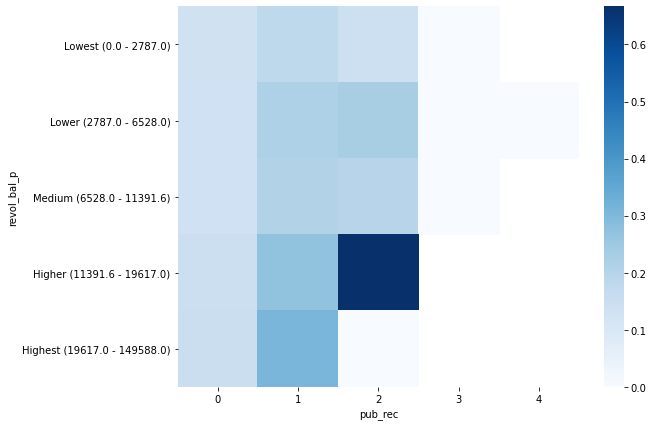

In [749]:
create_heatmap(index='revol_bal_p',columns='pub_rec')

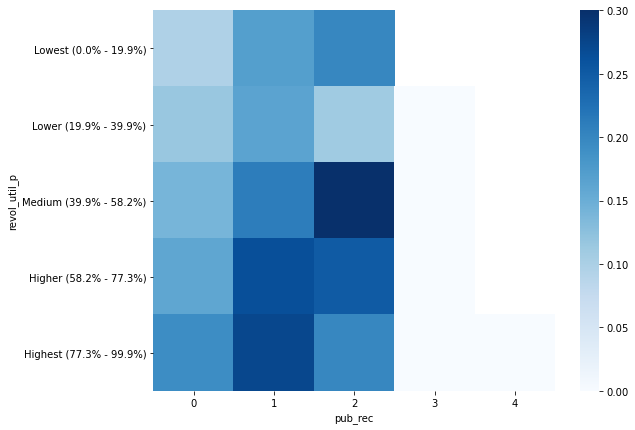

In [750]:
create_heatmap(index='revol_util_p',columns='pub_rec')

In [ ]:
python